# Fuel consumption data analysis

## Goal

The projects aims to conduct an analysis of emissions in the context of vehicular data, exploring how various factors contribute to the overall emission levels. The goal is to build a predictive model that can accurately estimate emissions based on key variables such as engine size, vehicle type and other relevant features. The insights derived from this analysis and the developed model aim to enhance our understanding of emission patterns and provide a valuable tool for predicting and managing emissions in the automotive sector.

## Importing packages

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading dataset

In [29]:
df1 = pd.read_csv('C:/Users/Zainab/Downloads/fuel consumption data set/Fuel_Consumption_2000-2022.csv')

In [30]:
df1.head(10)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
5,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,9.3,6.8,8.2,34,189
6,2000,ACURA,INTEGRA GSR/TYPE R,SUBCOMPACT,1.8,4,M5,Z,9.4,7.0,8.3,34,191
7,2000,ACURA,NSX,SUBCOMPACT,3.0,6,AS4,Z,13.6,9.2,11.6,24,267
8,2000,ACURA,NSX,SUBCOMPACT,3.2,6,M6,Z,13.8,9.1,11.7,24,269
9,2000,AUDI,A4,COMPACT,1.8,4,A5,Z,11.4,7.2,9.5,30,218


In [31]:
df1.shape

(22556, 13)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [33]:
df1.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


## Checking nulls

In [34]:
df1.isna().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

## Checking duplicates

In [35]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22551    False
22552    False
22553    False
22554    False
22555    False
Length: 22556, dtype: bool

In [36]:
df1['EMISSIONS'].mean()

250.06845185316544

## Emissions over the years

In [37]:
yearly = df1.groupby('YEAR')['EMISSIONS'].mean()

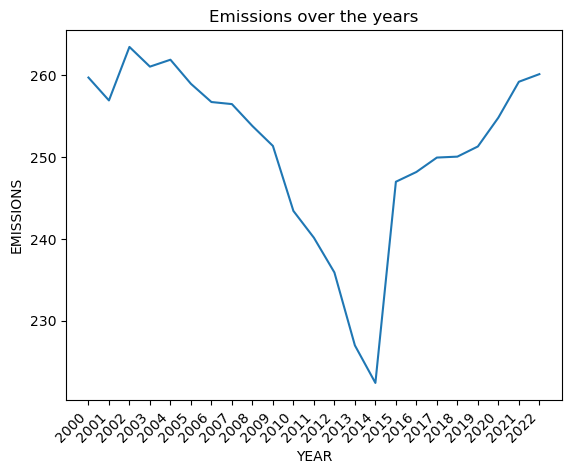

In [38]:
sns.lineplot(yearly)
plt.xlabel("YEAR")
plt.xticks(yearly.index, rotation =45, horizontalalignment ="right")

plt.ylabel("EMISSIONS")
plt.title("Emissions over the years")
plt.show()

The emissions slightly rose in 2002 but kept declining until 2014. After 2014 there was an increase in emissions each year up till 2022

## Correlation

In [39]:
correlation = df1.corr()

C:\Users\HeavenMarts.com\AppData\Local\Temp\ipykernel_11028\3349972549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr()


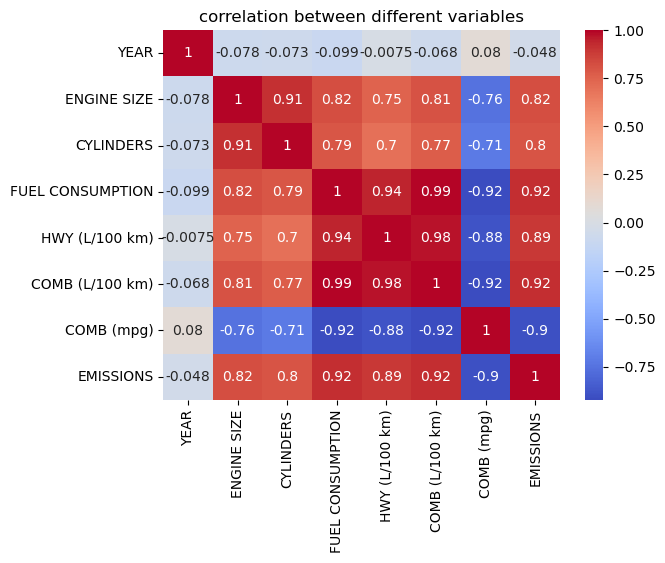

In [40]:
sns.heatmap(correlation, annot= True,cmap='coolwarm')
plt.title("correlation between different variables")
plt.show()

Emissions is highly correlated to comb(l/100),hwy(l/100),fuel consumption, cylinders and engine size

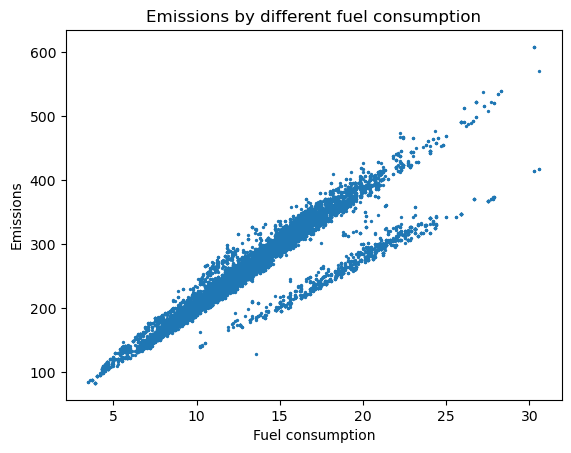

In [41]:
plt.scatter(df1['FUEL CONSUMPTION'],df1['EMISSIONS'],s =2 )
plt.xlabel("Fuel consumption")
plt.ylabel('Emissions')
plt.title("Emissions by different fuel consumption")
plt.show()

When the fuel consumption increases the number of emissions are also increasing.

In [42]:
cylinders = df1.groupby('CYLINDERS')['EMISSIONS'].mean()
print(cylinders)

CYLINDERS
2     257.375000
3     166.383648
4     198.976643
5     232.785571
6     254.745044
8     311.235782
10    356.308642
12    377.776053
16    538.250000
Name: EMISSIONS, dtype: float64


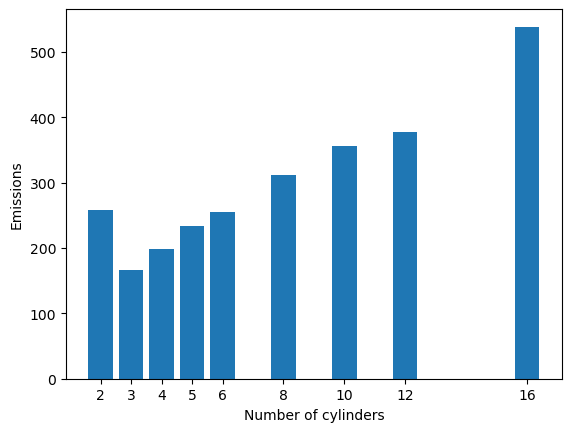

In [43]:
plt.bar(cylinders.index, cylinders.values)
plt.xlabel("Number of cylinders")
plt.xticks(cylinders.index)
plt.ylabel("Emissions")
plt.show()


When the number of cylinders increase the emissions also increase

## Mapping the fuel type

In [44]:
fueltype= {
"X" : "Regular gasoline",
"Z" : "Premium gasoline",
"D" : "Diesel",
"E" : "Ethanol",
"N" : "Natural Gas"
}
df1['fueltype'] = df1['FUEL'].map(fueltype)
df1

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,fueltype
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,Regular gasoline
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,Regular gasoline
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,Premium gasoline
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,Premium gasoline
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,Regular gasoline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,Premium gasoline
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,Premium gasoline
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,Premium gasoline
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,Premium gasoline


In [45]:
fueltype= df1.groupby('fueltype')["EMISSIONS"].mean()
print(fueltype)

fueltype
Diesel              230.305732
Ethanol             270.578898
Natural Gas         312.848485
Premium gasoline    260.574818
Regular gasoline    240.280748
Name: EMISSIONS, dtype: float64


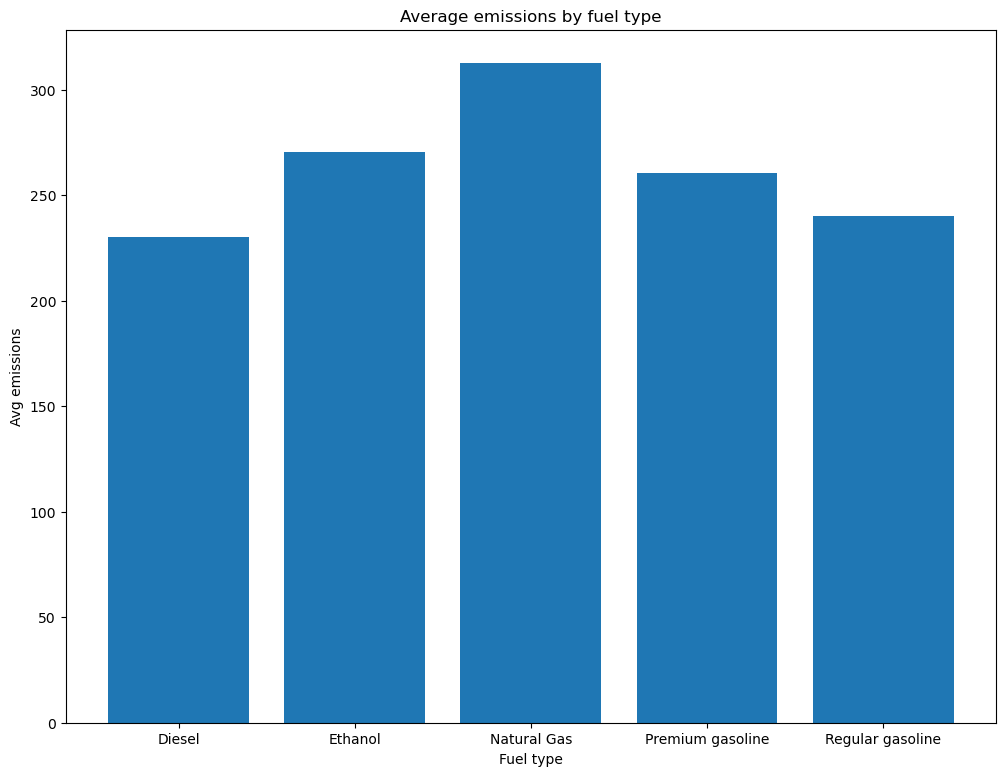

In [46]:
plt.figure(figsize =(12,9))
plt.bar(fueltype.index, fueltype.values)
plt.xlabel("Fuel type")
plt.ylabel('Avg emissions')
plt.title("Average emissions by fuel type")
plt.show()

Different fuel types have different level of emissions. Natural gas, ethanol and premium gasoline have the highest emissions

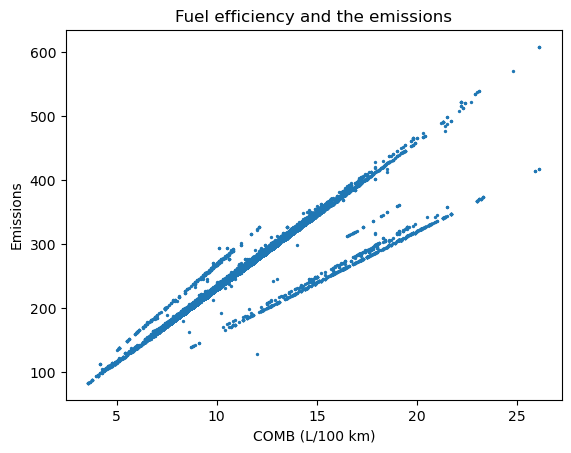

In [47]:
plt.scatter(df1['COMB (L/100 km)'], df1['EMISSIONS'], s=2)
plt.xlabel("COMB (L/100 km)")
plt.ylabel("Emissions")
plt.title("Fuel efficiency and the emissions")
plt.show()

 As the combined fuel consumption in liters per 100 kilometer increases the fuel consumption increases

## Cleaning the vehicle type column

The vehicle type column has inconsistent casing. I have standardized the casing to ensure uniformity

In [48]:
vehicletype = {
                   
"Compact" : "COMPACT",                    
"Full-size":"FULL-SIZE",                  
"Mid-size":"MID-SIZE",          
"Minicompact" : "MINICOMPACT",             
"Minivan":"MINIVAN",                    
"Pickup truck: Small" : "PICKUP TRUCK - SMALL", 
"Pickup truck: Standard" : "PICKUP TRUCK - STANDARD",                          
"SUV: Small" : "SUV - SMALL",            
"SUV: Standard": "SUV - STANDARD",               
"Special purpose vehicle" : "SPECIAL PURPOSE VEHICLE",    
"Station wagon: Mid-size"  :  "STATION WAGON - MID-SIZE",  
"Station wagon: Small"  : "STATION WAGON - SMALL",         
"Subcompact" : "SUBCOMPACT",                  
"Two-seater" : "TWO-SEATER",                 
"Van: Passenger" : "VAN - PASSENGER"           
}
df1['VEHICLE CLASS'] = df1['VEHICLE CLASS'].replace(vehicletype)
df1


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,fueltype
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186,Regular gasoline
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175,Regular gasoline
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230,Premium gasoline
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264,Premium gasoline
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198,Regular gasoline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,Premium gasoline
22552,2022,Volvo,XC60 B5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,Premium gasoline
22553,2022,Volvo,XC60 B6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,Premium gasoline
22554,2022,Volvo,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,Premium gasoline


## Emissions by different type of vehicles

In [49]:
emissionsbyvehicle = df1.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
print(emissionsbyvehicle )

VEHICLE CLASS
COMPACT                     211.539175
FULL-SIZE                   259.609448
MID-SIZE                    223.700676
MINICOMPACT                 236.807847
MINIVAN                     250.333333
PICKUP TRUCK - SMALL        265.610568
PICKUP TRUCK - STANDARD     301.931034
SPECIAL PURPOSE VEHICLE     233.043860
STATION WAGON - MID-SIZE    232.273902
STATION WAGON - SMALL       202.272520
SUBCOMPACT                  232.934328
SUV                         270.303030
SUV - SMALL                 230.335421
SUV - STANDARD              299.107843
TWO-SEATER                  273.921494
VAN - CARGO                 324.466867
VAN - PASSENGER             351.785953
Name: EMISSIONS, dtype: float64


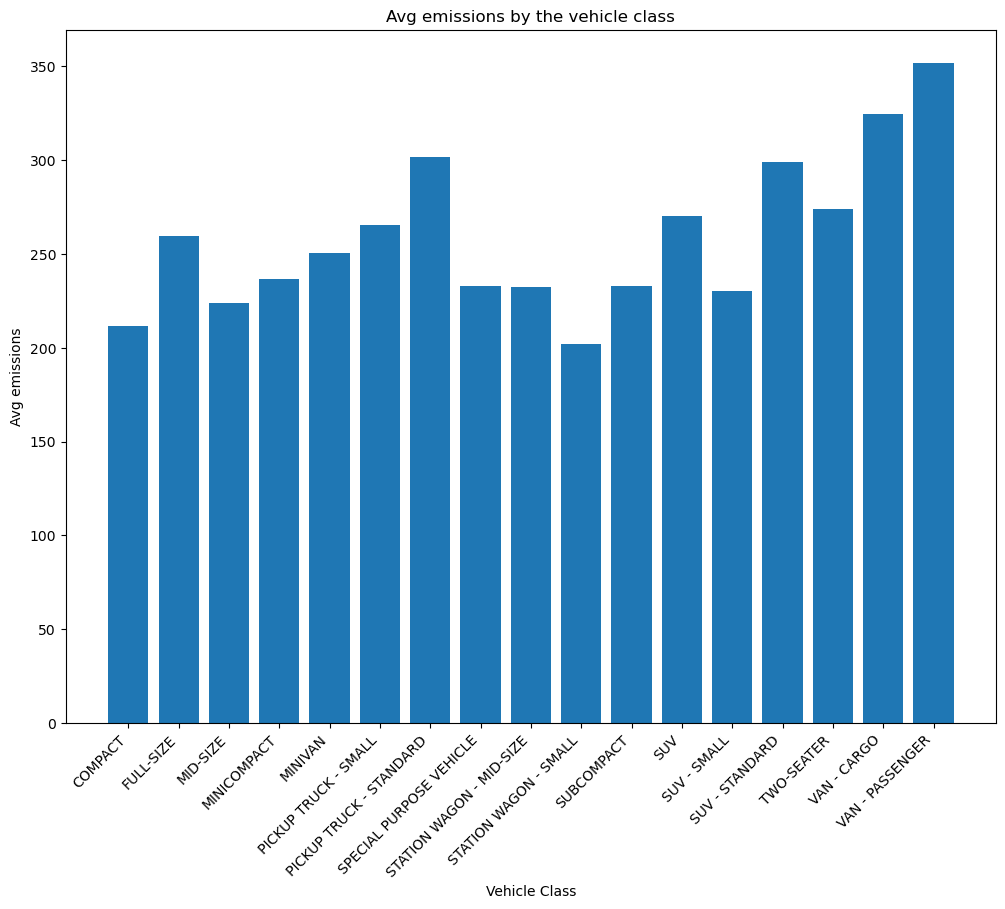

In [50]:
plt.figure(figsize =(12,9))
plt.bar(emissionsbyvehicle.index, emissionsbyvehicle.values)
plt.xlabel("Vehicle Class")
plt.xticks(rotation = 45, horizontalalignment ="right")
plt.ylabel("Avg emissions")
plt.title("Avg emissions by the vehicle class")
plt.show()

Passenger vans, cargo vans, standard SUVs and standard pickup trucks have the highest emissions

In [51]:
df1['TRANSMISSION'].value_counts()

A4      3519
AS6     2834
M6      2609
M5      2104
A6      1965
AS8     1733
A5      1420
AS5      865
AV       816
A8       794
AM7      689
AS7      614
A9       529
AS10     335
A7       278
AS4      245
AM6      214
AM8      164
A10      162
AV7      143
AV6      137
M7       130
AS9      110
AV8       78
AV10      25
A3        24
AV1        8
AM5        6
AM9        5
M4         1
Name: TRANSMISSION, dtype: int64

## Mapping transmission 

In [52]:
transmission_mapping = {
    'A4': 'Automatic-4',
    'AS6': 'Automatic with select shift-6',
    'M6': 'Manual-6',
    'M5': 'Manual-5',
    'A6': 'Automatic-6',
    'AS8': 'Automatic with select shift-8',
    'A5': 'Automatic-5',
    'AS5': 'Automatic with select shift-5',
    'AV': 'Continuously variable',
    'A8': 'Automatic-8',
    'AM7': 'Automated manual-7',
    'AS7': 'Automatic with select shift-7',
    'A9': 'Automatic-9',
    'AS10': 'Automatic with select shift-10',
    'A7': 'Automatic-7',
    'AS4': 'Automatic with select shift-4',
    'AM6': 'Automated manual-6',
    'AM8': 'Automated manual-8',
    'A10': 'Automatic-10',
    'AV7': 'Continuously variable-7',
    'AV6': 'Continuously variable-6',
    'M7': 'Manual-7',
    'AS9': 'Automatic with select shift-9',
    'AV8': 'Continuously variable-8',
    'AV10': 'Continuously variable-10',
    'A3': 'Automatic-3',
    'AV1': 'Continuously variable-1',
    'AM5': 'Automated manual-5',
    'AM9': 'Automated manual-9',
    'M4': 'Manual-4'
}
df1['TRANSMISSION'] = df1['TRANSMISSION'].replace(transmission_mapping)
emissionbytransmission =df1.groupby('TRANSMISSION')['EMISSIONS'].mean()
print(emissionbytransmission)

TRANSMISSION
Automated manual-5                131.333333
Automated manual-6                198.070093
Automated manual-7                268.869376
Automated manual-8                269.762195
Automated manual-9                260.000000
Automatic with select shift-10    280.200000
Automatic with select shift-4     231.187755
Automatic with select shift-5     249.912139
Automatic with select shift-6     241.950247
Automatic with select shift-7     261.201954
Automatic with select shift-8     260.854010
Automatic with select shift-9     245.481818
Automatic-10                      315.771605
Automatic-3                       285.666667
Automatic-4                       270.764138
Automatic-5                       273.287324
Automatic-6                       266.494656
Automatic-7                       271.575540
Automatic-8                       274.274559
Automatic-9                       250.761815
Continuously variable             175.491422
Continuously variable-1           161.2500

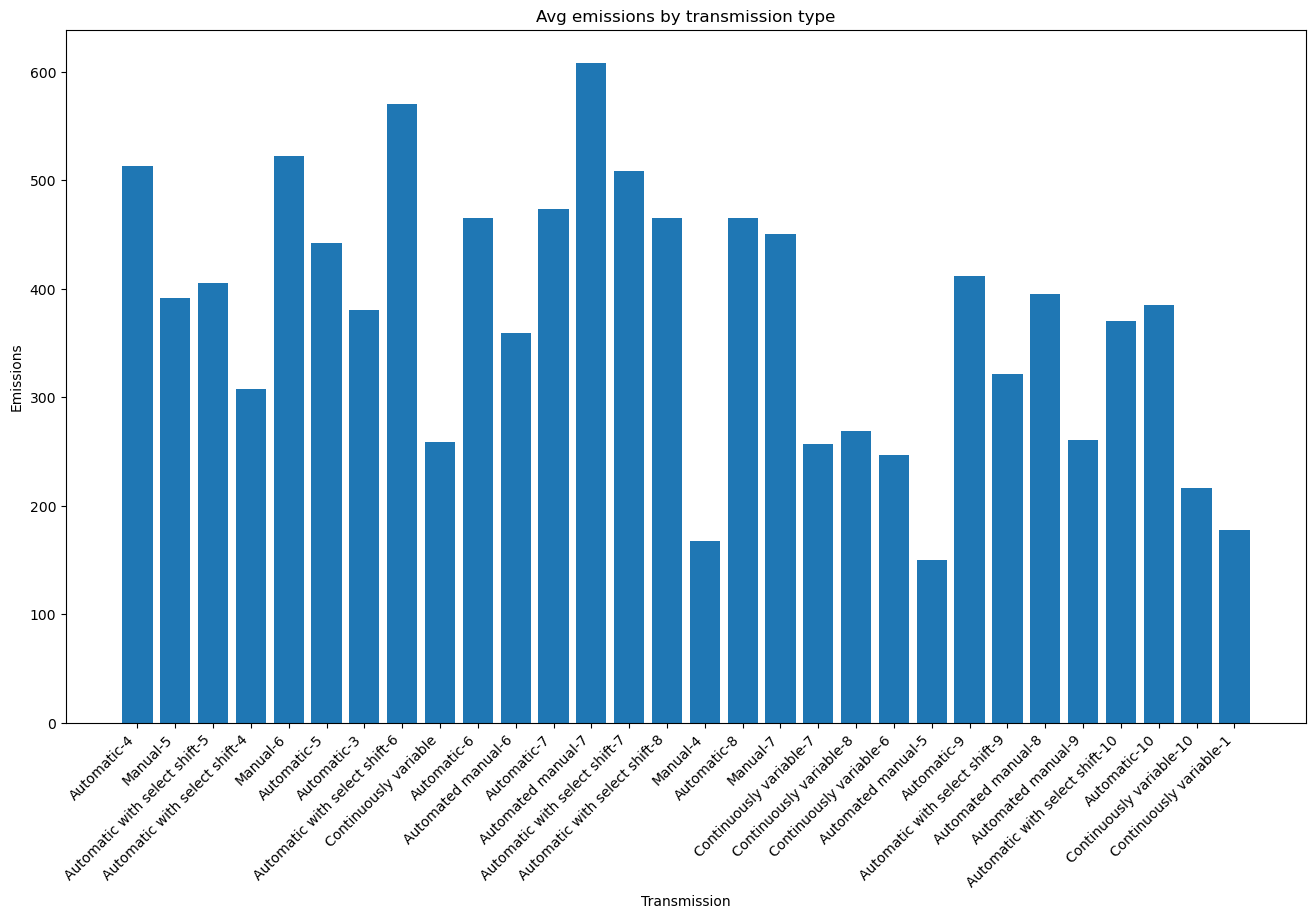

In [53]:
plt.figure(figsize= (16,9))
plt.bar(df1['TRANSMISSION'] ,df1['EMISSIONS'] )
plt.xlabel('Transmission')
plt.xticks(rotation = 45, horizontalalignment ="right")
plt.ylabel('Emissions')
plt.title("Avg emissions by transmission type")
plt.show()

The highest emissions are by the following transmission modes:
* Automatic with 4 gears,
* Manual with 6 gears,
* Automatic with select shift with 6 gears, 
* Automated manual with 7 gears,
* Automatic with select shift with 7 gears  

In [54]:

df1['Transmissiontype'] = df1['TRANSMISSION'].str.extract(r'([A-Za-z\s]+)')
df1

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS,fueltype,Transmissiontype
0,2000,ACURA,1.6EL,COMPACT,1.6,4,Automatic-4,X,9.2,6.7,8.1,35,186,Regular gasoline,Automatic
1,2000,ACURA,1.6EL,COMPACT,1.6,4,Manual-5,X,8.5,6.5,7.6,37,175,Regular gasoline,Manual
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,Automatic with select shift-5,Z,12.2,7.4,10.0,28,230,Premium gasoline,Automatic with select shift
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,Automatic-4,Z,13.4,9.2,11.5,25,264,Premium gasoline,Automatic
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,Automatic-4,X,10.0,7.0,8.6,33,198,Regular gasoline,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic with select shift-8,Z,10.7,7.7,9.4,30,219,Premium gasoline,Automatic with select shift
22552,2022,Volvo,XC60 B5 AWD,SUV - SMALL,2.0,4,Automatic with select shift-8,Z,10.5,8.1,9.4,30,219,Premium gasoline,Automatic with select shift
22553,2022,Volvo,XC60 B6 AWD,SUV - SMALL,2.0,4,Automatic with select shift-8,Z,11.0,8.7,9.9,29,232,Premium gasoline,Automatic with select shift
22554,2022,Volvo,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic with select shift-8,Z,11.5,8.4,10.1,28,236,Premium gasoline,Automatic with select shift


In [55]:
emissionbytransmissiontype =df1.groupby('Transmissiontype')['EMISSIONS'].mean()
print(emissionbytransmissiontype)


Transmissiontype
Automated manual               254.143785
Automatic                      270.220343
Automatic with select shift    251.159442
Continuously variable          180.619718
Manual                         228.793146
Name: EMISSIONS, dtype: float64


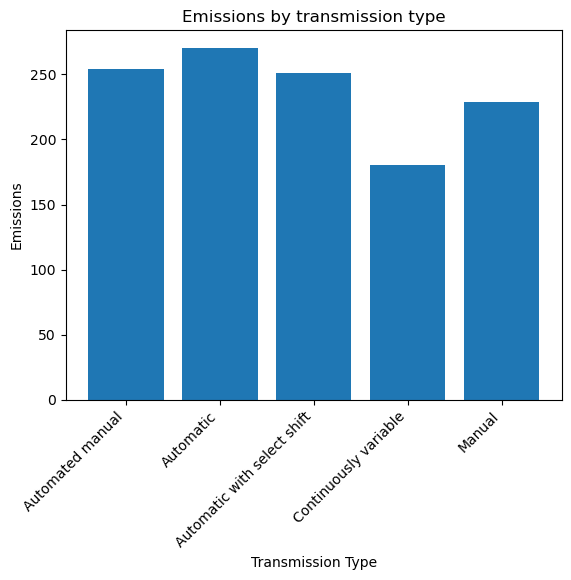

In [56]:
plt.bar(emissionbytransmissiontype.index, emissionbytransmissiontype.values)
plt.xlabel('Transmission Type')
plt.xticks(rotation =45, horizontalalignment ="right")
plt.ylabel('Emissions')
plt.title('Emissions by transmission type')
plt.show()

## Emissions by make of vehicles

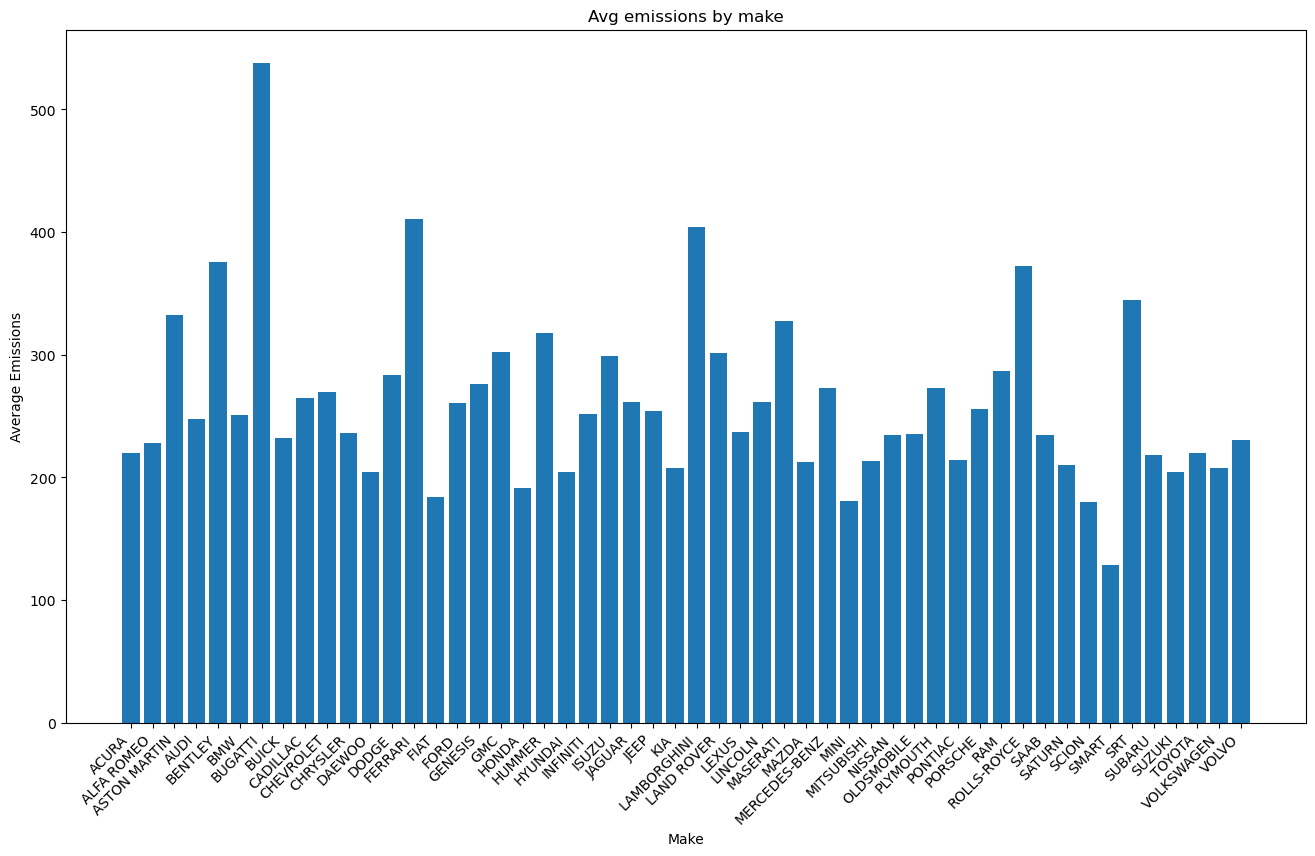

In [57]:
df1['MAKE'] = df1['MAKE'].str.upper()
emissionbymake =df1.groupby('MAKE')['EMISSIONS'].mean()

plt.figure(figsize =(16,9))
plt.bar(emissionbymake.index, emissionbymake.values)
plt.xlabel("Make")
plt.xticks(rotation =45, horizontalalignment = "right")
plt.ylabel('Average Emissions')
plt.title('Avg emissions by make')
plt.show()

BMW, Bentley,Ferrari,Lamborghini and Rolls Royce have the highest average emission

## Emissions by different engine sizes

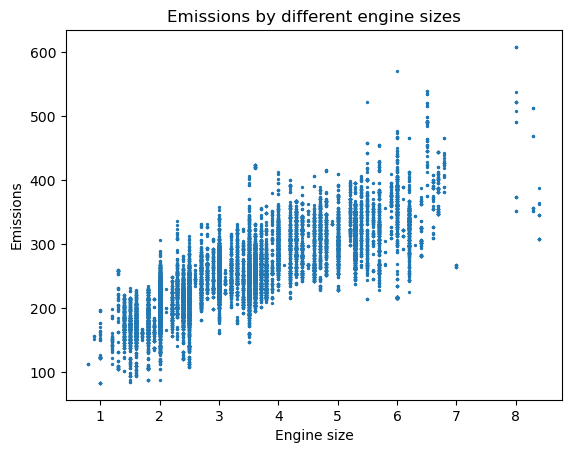

In [58]:
plt.scatter(df1['ENGINE SIZE'],df1['EMISSIONS'],s =2 )
plt.xlabel("Engine size")
plt.ylabel('Emissions')
plt.title("Emissions by different engine sizes")
plt.show()

As the Engine size increases the emissions are also increasing

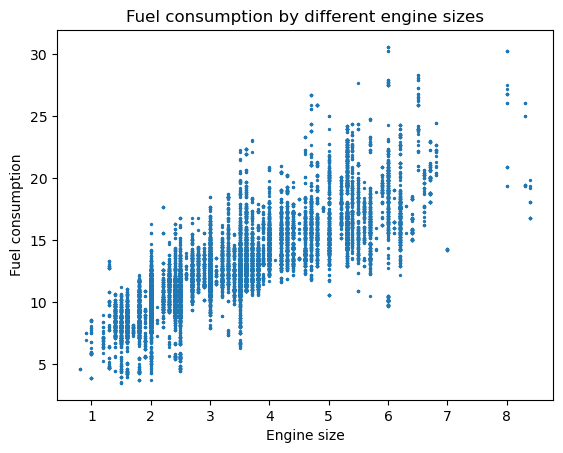

In [59]:
plt.scatter(df1['ENGINE SIZE'],df1['FUEL CONSUMPTION'],s =2 )
plt.xlabel("Engine size")
plt.ylabel('Fuel consumption')
plt.title("Fuel consumption by different engine sizes")
plt.show()

When the engine size increases the fuel consumption also increases.

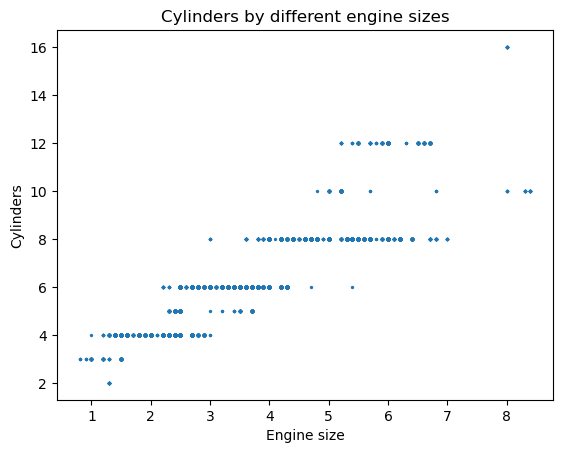

In [60]:
plt.scatter(df1['ENGINE SIZE'],df1['CYLINDERS'],s =2 )
plt.xlabel("Engine size")
plt.ylabel('Cylinders')
plt.title("Cylinders by different engine sizes")
plt.show()

As the engine size increases the number of cylinders in the engine also increase.

## Making a linear regression model with multiple variables to predict emissions

### Encoding variables

In [61]:
fuel_mapping ={"Regular gasoline":1,"Premium gasoline":2,"Ethanol":3,"Diesel":4,"Natural Gas":5}
df1['fueltype_encoded']= df1['fueltype'].map(fuel_mapping)
df1['fueltype_encoded'].value_counts()

1    11822
2     9316
3     1071
4      314
5       33
Name: fueltype_encoded, dtype: int64

In [62]:
transmission_mapping = {
    "Automated manual": 1,         
    "Automatic":2,     
    "Automatic with select shift":3,
    "Continuously variable":4,        
    "Manual":5   
}
df1['transmissiontype_encoded']= df1['Transmissiontype'].map(transmission_mapping)
df1['transmissiontype_encoded'].value_counts()

2    8691
3    6736
5    4844
4    1207
1    1078
Name: transmissiontype_encoded, dtype: int64

### Importing packages

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Setting the feature and target variables

We are predicting the emissions based on different features therefore emissions is the y variable.

Engine size is an important factor that affects the emissions therefore it is chosen as a feature. The fuel consumption and number of cylinders is highly correlated to Engine size therefore they can cause multicollinearity and have not been included as features

Fuel efficiency- comb(l/100km) is another factor that infleunces emissions. The other columns HWY(l/100km) and comb(mfg) are highly correlated to combined fuel consumption in liters per 100 km and can cause multicollinearity and therefore are not included in the model

The model might learn patterns related to the year of the vehicle as newer models might have different fuel efficiency technologies.Therefore Year is chosen as a feature

Different fuel types have different amount of emissions and therefore is an important factor in predicting emissions

In [64]:
X= df1[['ENGINE SIZE','COMB (L/100 km)','YEAR','fueltype_encoded']]
Y= df1['EMISSIONS']

### Splitting data into training and testing data set

In [65]:
X_train, X_test, Y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state =42)

### Fitting the model to the training data set

In [66]:
model=LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

### Using model to predict test data

In [67]:
y_pred = model.predict(X_test)

### Checking model efficiency by the metrics

In [68]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error : {mse}')
print(f'R_score:{r2}')

Mean squared error : 405.94610222749543
R_score:0.8827241973903507


The mean squared error is 405.95 and R2 score is 0.8827

The mean squared error is low 

High r2 score indicates that a large proportion of the variability in the dependent variable is explained by the independent variables in the model

### Checking the intercept and coefficient

In [69]:
model.intercept_

-558.4791320444256

In [70]:
model.coef_

array([  8.66950824,  16.38191406,   0.30590335, -10.722419  ])

### Summary

The emissions slightly rose in 2002 but kept declining until 2014. After 2014 there was an increase in emissions each year up till 2022

Emissions is highly correlated to combined fuel consumption(l/100), HWY(l/100),fuel consumption, cylinders and engine size:

When the fuel consumption increases the number of emissions are also increasing.

When the number of cylinders increase the number of emissions also increase

As the Engine size increases the emissions are also increasing

When the engine size increases the fuel consumption also increases

As the engine size increases the number of cylinders in the engine also increase.

Different fuel types have different amount of emissions. Natural gas, ethanol and premium gasoline have the highest emissions

BMW, Bentley,Ferrari,Lamborghini and Rolls Royce have the highest average emission

As the combined fuel consumption in liters per 100 kilometer increases the fuel consumption increases

Passenger vans, cargo vans, standard SUVs and standard pickups trucks have the highest emissions

The highest emissions are by the following transmission modes:
* Automatic with 4 gears,
* Manual with 6 gears,
* Automatic with select shift with 6 gears,
* Automated manual with 7 gears,
* Automatic with select shift with 7 gears

I created a linear regression model with multiple features to predict the number of emissions based on engine size, combined fuel consumption in liters per 100 km, year and fuel type.

The mean squared error is 405.95 and R2 score is 0.8827. The mean squared error is low and high r2 score indicates that a large proportion of the variability in the dependent variable is explained by the independent variables in the model
